# 📊 Benchmark de Recursos (Docker o VM)
Este notebook mide el uso de CPU, memoria y latencia de red durante 30 segundos, guarda los datos en un CSV y muestra gráficos de evolución.

In [ ]:
# Cambia esto a "VM" si estás en máquina virtual
entorno = "Docker"

Tomando muestras por 30 segundos en entorno: VM...
✅ Datos guardados en 'benchmark_simple_vm.csv'


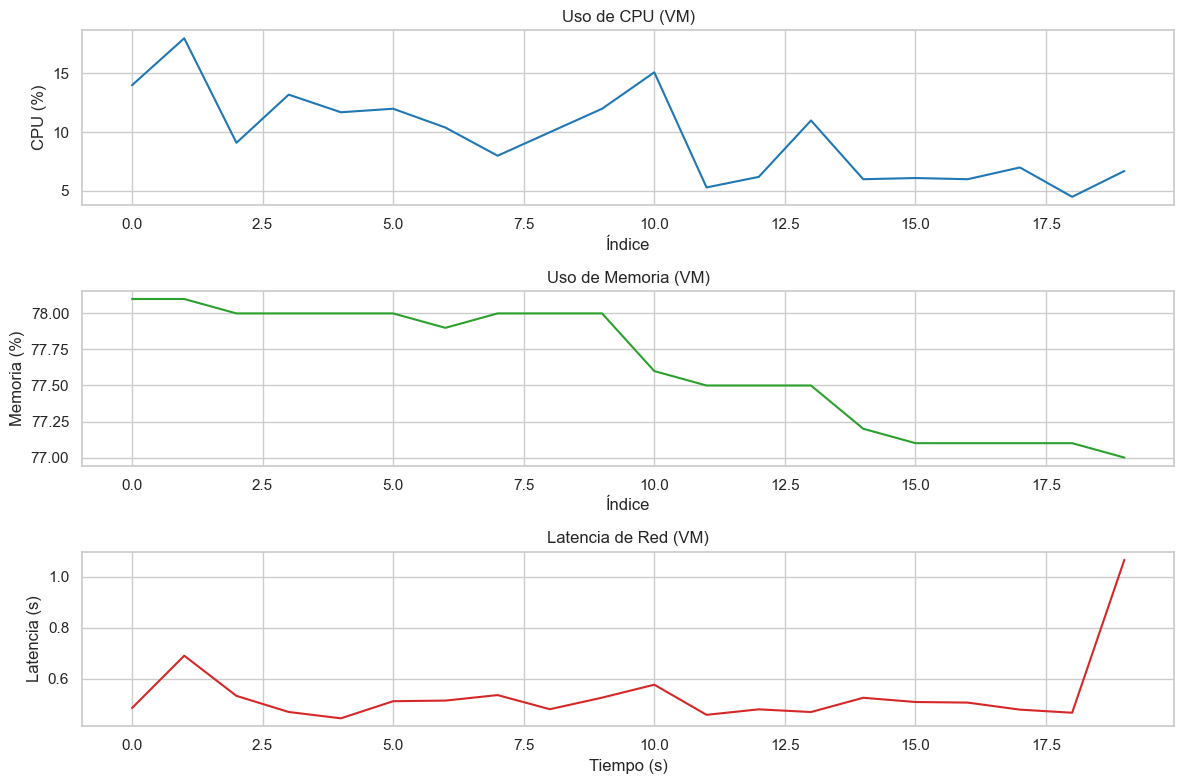

In [4]:
import psutil
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir entorno: "Docker" o "VM"
entorno = "VM"

# Inicializar listas
cpu_samples = []
mem_samples = []
latency_samples = []

# URL para latencia
url = "https://httpbin.org/get"

print(f"Tomando muestras por 30 segundos en entorno: {entorno}...")
start_time = time.time()
while time.time() - start_time < 30:
    cpu = psutil.cpu_percent(interval=None)
    mem = psutil.virtual_memory().percent

    try:
        start_req = time.time()
        requests.get(url, timeout=5)
        latency = time.time() - start_req
    except requests.RequestException:
        latency = None

    cpu_samples.append(cpu)
    mem_samples.append(mem)
    latency_samples.append(latency)
    time.sleep(1)

# Crear DataFrame
df = pd.DataFrame({
    "Índice": range(len(cpu_samples)),
    "cpu_percent": cpu_samples,
    "memory_percent": mem_samples,
    "latency": latency_samples
})

# Guardar CSV
filename = f"benchmark_simple_{entorno.lower()}.csv"
df.to_csv(filename, index=False)
print(f"✅ Datos guardados en '{filename}'")

# Renombrar columnas para graficar
df.rename(columns={"cpu_percent": "CPU (%)", "memory_percent": "Memoria (%)", "latency": "Latencia"}, inplace=True)

# Mostrar gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.lineplot(data=df, x="Índice", y="CPU (%)", color="tab:blue")
plt.title(f"Uso de CPU ({entorno})")
plt.ylabel("CPU (%)")

plt.subplot(3, 1, 2)
sns.lineplot(data=df, x="Índice", y="Memoria (%)", color="tab:green")
plt.title(f"Uso de Memoria ({entorno})")
plt.ylabel("Memoria (%)")

plt.subplot(3, 1, 3)
sns.lineplot(data=df, x="Índice", y="Latencia", color="tab:red")
plt.title(f"Latencia de Red ({entorno})")
plt.ylabel("Latencia (s)")
plt.xlabel("Tiempo (s)")

plt.tight_layout()
plt.show()
